Part 1. Exploratory Data Analysis
     The following explorartory analysis is applying IBM's explore procedure, four major parts will be included:
     1. Screen Data
     2. Identify Outlier
     3. Check Assumptions
     4. Characterized Differences Amoung Groups of Case
 
Part 2: Data Preprocessing:
     1. Reducing Model
     2. Splitting Independents and Dependent Variables
     3. Splitting Training Set and Validation Set

Part 3: Price Prediction Model Applying Machine Learning Methods:
     1. Linear Regression Algorithm
     2. Decision Tree 
     3. Random Forest

 1. Screen Data

In [249]:
import pandas as pd
import matplotlib.pyplot as pplot
import seaborn as seab
import numpy as np
from scipy.stats import norm

1.1 Import data  

In [295]:
df = pd.read_csv(r'C:\Users\mingshi\Documents\New folder - Coding File\Airbnb\AB_NYC_2019.csv')

In [251]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [252]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [253]:
#Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [254]:
#check number of columns and rows
df.shape

(48895, 16)

In [255]:
#Check_Duplicates
temp_df = df.append(df)

In [256]:
#shape_shall_show_double_rows
temp_df.shape

(97790, 16)

In [257]:
#Remove_Duplicates
temp_df = temp_df.drop_duplicates()

In [258]:
##shape_shall_show_downsize_rows
temp_df.shape

(48895, 16)

In [260]:
df.shape

(48895, 16)

In [261]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [262]:
df.rename(columns={
        'availability_365': 'availability'
    }, inplace=True)

In [263]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count', 'availability'],
      dtype='object')

In [296]:
#Check Null Value
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [298]:
#Get a sum of null value, found there are major null values in reviews_per_month (Exclude last_review) 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [299]:
reviews_per_month = df['reviews_per_month']
last_review = df['last_review']

In [300]:
#Get the mean of review per month  
reviews_per_month_mean=reviews_per_month.mean()

In [301]:
reviews_per_month.mean

<bound method Series.mean of 0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64>

In [302]:
#Handling missing value
reviews_per_month.fillna(reviews_per_month_mean, inplace=True)

In [303]:
#Validating to see if all missing value for reviews per month are filled. Return Reviews_per_month has 0 null value.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [304]:
#Take closer look after removing duplicates, fill in Null values
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [305]:
price = df['price']
price.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [306]:
price_mean=price.mean()
price_mean

152.7206871868289

In [307]:
df['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [308]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [309]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

2. Identify Outlier - Univariate Method
#Check if there is outlier by visulization a boxplot for price matrix

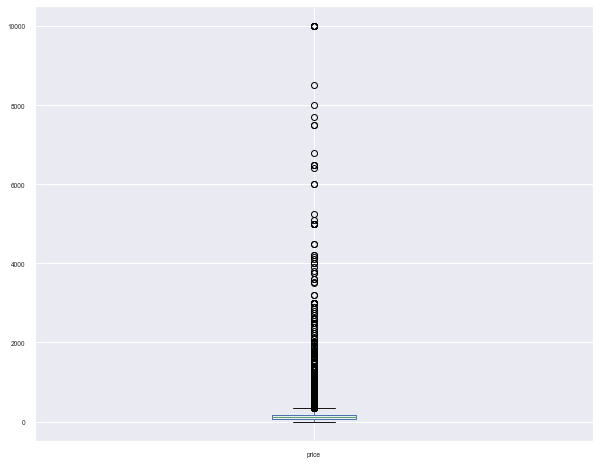

In [310]:
df['price'].plot(kind="box")

In [311]:
#the box plot above shows there are some very high prices far away from the majority of the price range, way up from pper whisker
#To be said, there are outliner in the data that needs to be cleaned out for further analysis on pricing.

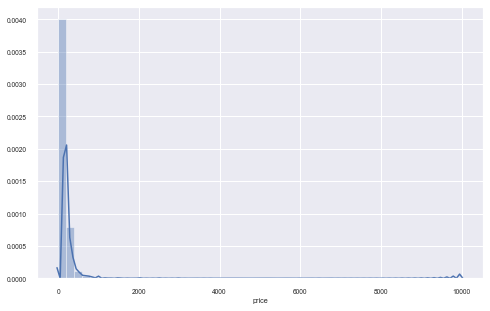

In [312]:
#taking a closer look at the distribution in pricing and see if it needs to be standardazied.
pplot.figure(figsize = (8,5))
seab.distplot(price)

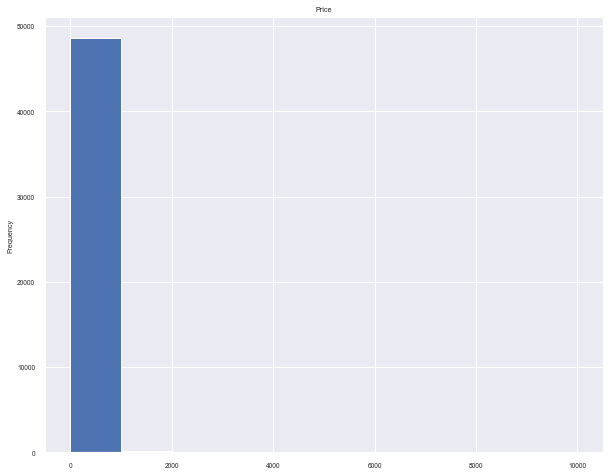

In [313]:
df['price'].plot(kind='hist', title='Price');

Converting to normal distribution

In [314]:
#avoiding dividing by 0
df['price'] = np.log(df.price+1)

Text(0.5, 1.0, 'Price Distribution Plot After Log')

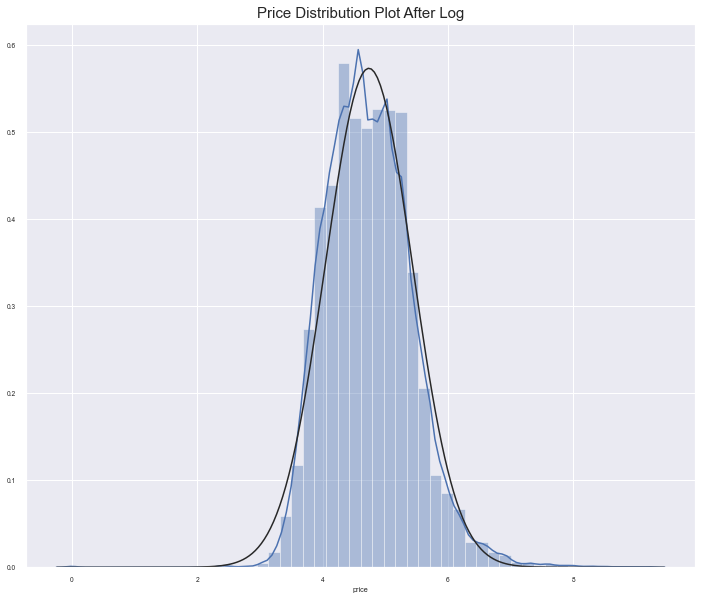

In [315]:
pplot.figure(figsize=(12,10))
seab.distplot(df['price'],fit=norm)
pplot.title("Price Distribution Plot After Log",size =15)
#pplot.axvspan(xmin = lower, xmax=df['price'].min(),alpha = 0.2, color = red)


In [316]:
#define a function to find out lower and upper whisker using standard deviation Methods:

def out_std(df,column):
    global lower, upper
    data_mean, data_std = df[column].mean(),df[column].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    
    df1 = df[df[column]>upper]
    df2 = df[df[column]<lower]
    
    return print('The count of outliers is',df1.shape[0]+df2.shape[0])

In [317]:
#using the standard deviation function is find out outlier
out_std(df,'price')

The lower bound value is 2.650851853027325
The upper bound value is 6.822917567745527
The count of outliers is 388


By applying the Standard Devivation Method, detecting 221 outlier, visualizing the outlier 


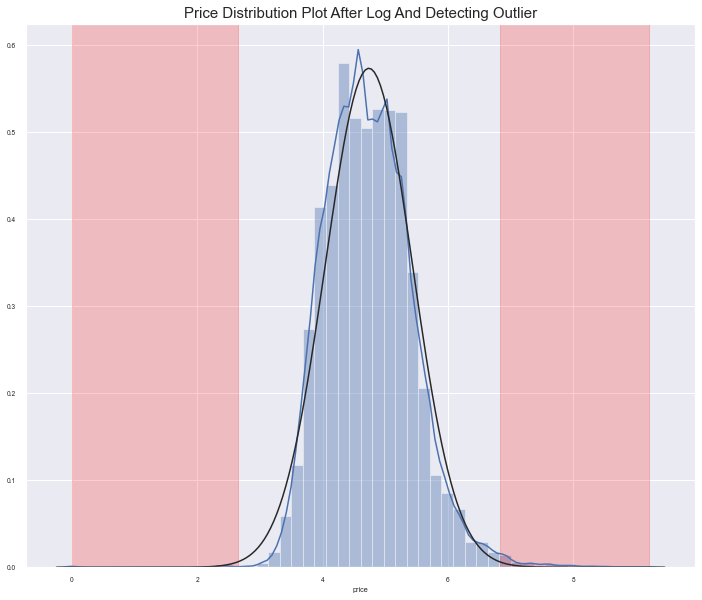

In [318]:
pplot.figure(figsize=(12,10))
seab.distplot(df['price'],fit=norm)
pplot.title("Price Distribution Plot After Log And Detecting Outlier",size =15)
pplot.axvspan(xmin=lower, xmax = df['price'].min(), alpha = 0.2, color = 'red')
pplot.axvspan(xmin=upper, xmax = df['price'].max(), alpha = 0.2, color = 'red')

Removing outlier

In [319]:
df = df[(df['price']<upper) & ( df['price']>lower)]

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48507 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48507 non-null  int64  
 1   host_id                         48507 non-null  int64  
 2   neighbourhood_group             48507 non-null  object 
 3   neighbourhood                   48507 non-null  object 
 4   latitude                        48507 non-null  float64
 5   longitude                       48507 non-null  float64
 6   room_type                       48507 non-null  object 
 7   price                           48507 non-null  float64
 8   minimum_nights                  48507 non-null  int64  
 9   number_of_reviews               48507 non-null  int64  
 10  reviews_per_month               48507 non-null  float64
 11  calculated_host_listings_count  48507 non-null  int64  
 12  availability_365                

Text(0.5, 1.0, 'Price Distribution Plot After Log And Removing Outlier')

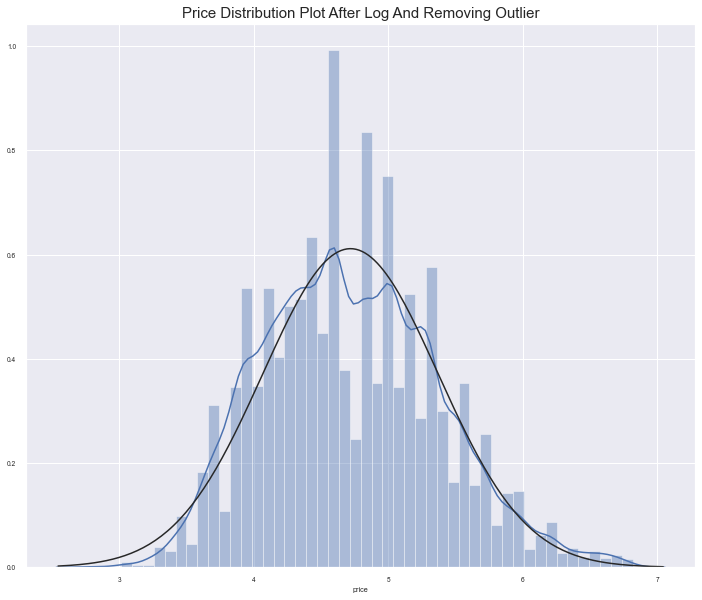

In [320]:
pplot.figure(figsize=(12,10))
seab.distplot(df['price'],fit=norm)
pplot.title("Price Distribution Plot After Log And Removing Outlier",size =15)

3. Check Assumption: 
    
    Assumption 1: more availablity with higher price. 
    
    Assumption 2: a host with more listings with higher price.
    
    Assumption 3: entire home/appartment is having higher price than private room and share room.
    
    Assumption 4: Mahattan is having the highest price among other neighbourhood.

In [321]:
# numerical representation of the bivariate relationships in the dataset
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588114,-0.003114,0.091482,-0.015569,-0.014354,-0.320726,0.253390,0.133923,0.084482
host_id,0.588114,1.000000,0.020170,0.128354,-0.018681,-0.018319,-0.140445,0.255138,0.155635,0.204514
latitude,-0.003114,0.020170,1.000000,0.084851,0.082152,0.025360,-0.015156,-0.008795,0.019480,-0.011290
longitude,0.091482,0.128354,0.084851,1.000000,-0.332244,-0.063965,0.057938,0.131804,-0.115700,0.085128
price,-0.015569,-0.018681,0.082152,-0.332244,1.000000,0.024343,-0.034943,-0.030256,0.144480,0.089825
minimum_nights,-0.014354,-0.018319,0.025360,-0.063965,0.024343,1.000000,-0.080189,-0.092902,0.129999,0.144768
number_of_reviews,-0.320726,-0.140445,-0.015156,0.057938,-0.034943,-0.080189,1.000000,0.530449,-0.072755,0.174144
reviews_per_month,0.253390,0.255138,-0.008795,0.131804,-0.030256,-0.092902,0.530449,1.000000,-0.006847,0.164899
calculated_host_listings_count,0.133923,0.155635,0.019480,-0.115700,0.144480,0.129999,-0.072755,-0.006847,1.000000,0.227409
availability_365,0.084482,0.204514,-0.011290,0.085128,0.089825,0.144768,0.174144,0.164899,0.227409,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

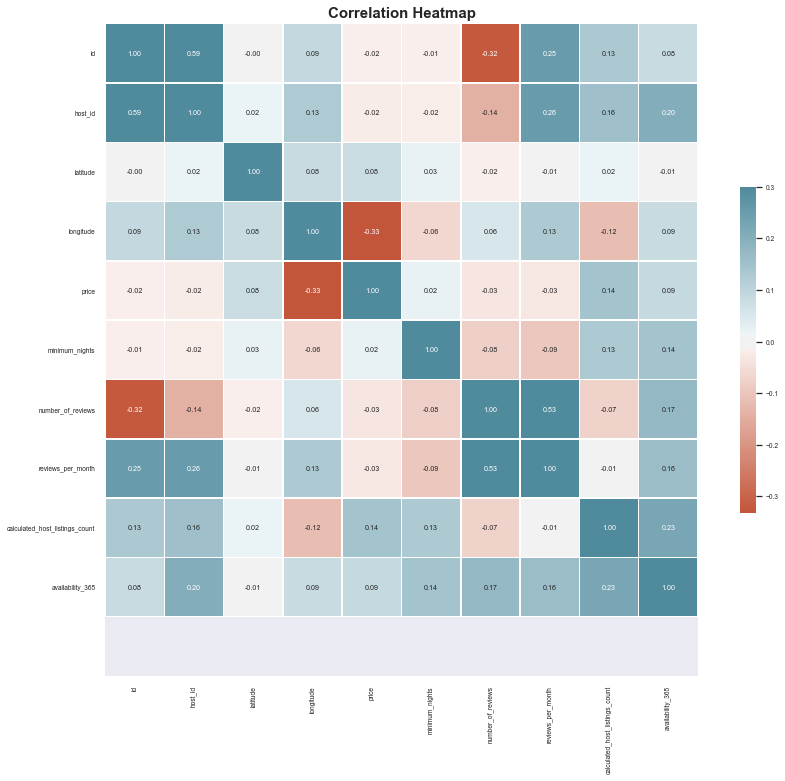

In [322]:
#using pearson correlation matrix to visualize a heatmap


pplot.figure(figsize=(15,12))
palette = seab.diverging_palette(20,220,n=256)
corr=df.corr(method= 'pearson')
seab.heatmap(corr,annot=True, fmt=".2f",cmap=palette,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5}).set(ylim=(11,0))
seab.set(font_scale = 0.6 )
pplot.title("Correlation Heatmap", size = 15, weight ='bold')


#Checking assumptions:
Assuming 1 : more availablity with higher price: 

   Is availablity having positive correlation to the price? YES
   
Assuming 2: a host with more listings with higher price:

   Is calculated_host_listing_count having positive correlation to the price? YES

Text(0, 0.5, 'Price')

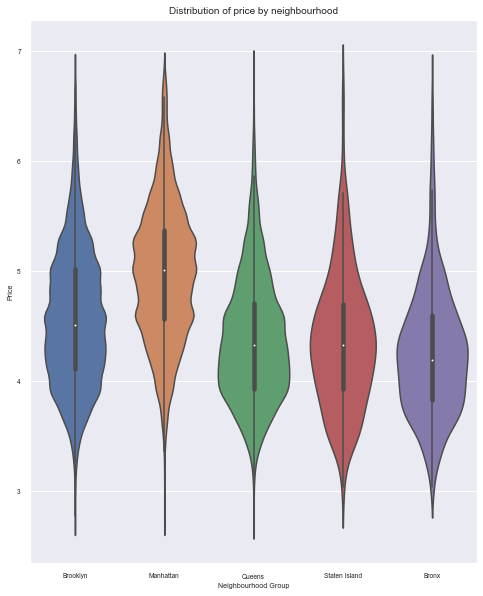

In [323]:
pplot.figure(figsize=(8,10))
seab.violinplot(df_temp = 10**df['price'],x= df['neighbourhood_group'], y=df['price'],pallette  = 'GnBu_d')
pplot.title("Distribution of price by neighbourhood",fontsize = 10)
pplot.xlabel('Neighbourhood Group')
pplot.ylabel('Price')

In [324]:
mean_price_per_neighbourhood_group = (df.groupby('neighbourhood_group')['price']).mean()

mean_price_per_neighbourhood_group 

neighbourhood_group
Bronx            4.256573
Brooklyn         4.568543
Manhattan        4.980619
Queens           4.380388
Staten Island    4.366410
Name: price, dtype: float64

In [325]:
mean_price_per_room_type = df.groupby('room_type')['price'].mean()
mean_price_per_room_type 


room_type
Entire home/apt    5.123899
Private room       4.302240
Shared room        3.970737
Name: price, dtype: float64

Assumption 3: entire home/appartment is having higher price than private room and share room. 
             --is entire home/appartment is having higher mean price than private room and share room? YES

Assumption 4: Mahattan is having the highest price among other neighbourhood. YES
            --is entire home/appartment is having higher mean price than private room and share room? YES


4. Characterized Differences Amoung Groups of Case:

In [42]:
#Check the first 4 rows and see if the airbnb home is in Manhattan:
condition = (df['neighbourhood_group'] == "Manhattan")

condition.head()

##Manhattan = df.loc["Manhattan"]

0    False
1     True
2     True
3    False
4     True
Name: neighbourhood_group, dtype: bool

In [44]:
#Check the airbnb home is in Manhattan or having availability with over 200 days in a year:
df[(df['neighbourhood_group'] == "Manhattan") | (df['availability'] >= 200)].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129


In [45]:
##Check the airbnb home is in Manhattan and having availability with over 200 days in a year:
df[(df['neighbourhood_group'] == "Manhattan") & (df['availability'] >= 200)].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.910000,1,333
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,1.373221,2,249


In [47]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


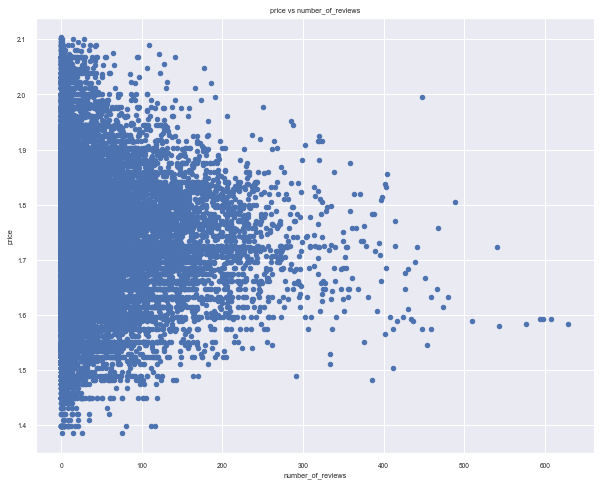

In [161]:
#Checking the relationship between number of views and price
df.plot(kind='scatter', x='number_of_reviews', y='price', title='price vs number_of_reviews')

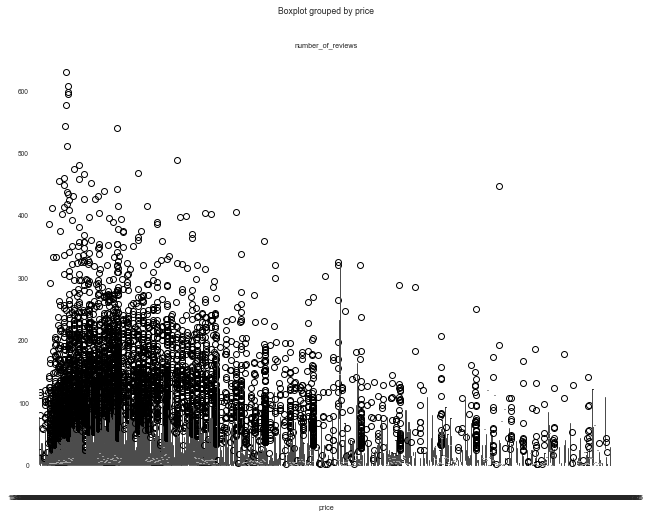

In [164]:
df.boxplot(column='number_of_reviews', by='price')

Part 2: Data Pre-processing
    1. Model Reducing

In [ ]:
#Removing the columns that not needed in the pricing model, including host_id, host_name and last review date.

In [365]:
df = df.drop (['host_name','name','last_review'])


KeyError: "['host_name' 'name' 'last_review'] not found in axis"

2. Converting String to number

In [388]:
#converted string to binary columns
df_string_converted = pd.get_dummies(df, columns= ['neighbourhood_group','room_type'])
df_string_converted.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,Kensington,40.64749,-73.97237,5.010635,1,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,2595,2845,Midtown,40.75362,-73.98377,5.420535,1,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,3647,4632,Harlem,40.80902,-73.94190,5.017280,3,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,3831,4869,Clinton Hill,40.68514,-73.95976,4.499810,1,270,4.640000,1,194,0,1,0,0,0,1,0,0
4,5022,7192,East Harlem,40.79851,-73.94399,4.394449,10,9,0.100000,1,0,0,0,1,0,0,1,0,0


In [389]:
x=df_string_converted.drop(['price'],axis =1)
y=df_string_converted['price']

In [390]:
y.head(4)

0    5.010635
1    5.420535
2    5.017280
3    4.499810
Name: price, dtype: float64

In [391]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
x['neighbourhood'] = label.fit_transform(x['neighbourhood'])

In [392]:
x.head(5)

,id,host_id,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,108,40.64749,-73.97237,1,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,2595,2845,127,40.75362,-73.98377,1,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,3647,4632,94,40.80902,-73.94190,3,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,3831,4869,41,40.68514,-73.95976,1,270,4.640000,1,194,0,1,0,0,0,1,0,0
4,5022,7192,61,40.79851,-73.94399,10,9,0.100000,1,0,0,0,1,0,0,1,0,0


In [393]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [394]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Part 3: Machine Learning 

1. Linear Regression Algorithm

R-Square Score:  53.284405075479114
Mean Absolute Error: 4.72 degrees.


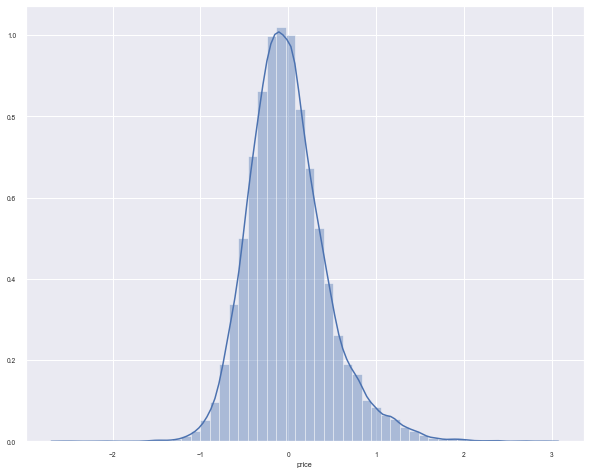

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linear = LinearRegression()

linear.fit(x_train, y_train)

linear_pred = linear.predict(x_test)

r2 = r2_score(y_test,linear_pred)
print('R-Square Score: ',r2*100)


# Calculate the absolute errors
linear_errors = abs(linear_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(linear_pred), 2), 'degrees.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (linear_errors / y_test)


seab.distplot(y_test-linear_pred)

In [400]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('mse:',mean_squared_error(y_test, linear_pred))
print('mae:',mean_absolute_error(y_test, linear_pred))
print('rmse', np.sqrt(mean_absolute_error(y_test, linear_pred)))

mse: 0.20052934731396174
mae: 0.341332505370196
rmse 0.5842366860872363


2. Decision Tree 

In [411]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(x_train, y_train)


dtree_pred = dtree.predict(x_test)

r2 = r2_score(y_test,dtree_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
dtree_errors = abs(dtree_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(dtree_pred), 2), 'degrees.')

R-Square Score:  28.78440650329852
Mean Absolute Error: 4.73 degrees.


In [412]:
print('mse:',mean_squared_error(y_test, dtree_pred))
print('mae:',mean_absolute_error(y_test, dtree_pred))
print('rmse', np.sqrt(mean_absolute_error(y_test, dtree_pred)))

mse: 0.30569698417720464
mae: 0.40943665051843653
rmse 0.6398723704915196


3. Random Forest

In [413]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)

rf_pred = random_forest_regressor.predict(x_test)

r2 = r2_score(y_test,rf_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
rf_errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_pred), 2), 'degrees.')

R-Square Score:  64.9387727295827
Mean Absolute Error: 4.73 degrees.


In [414]:
print('mse:',mean_squared_error(y_test, rf_pred))
print('mae:',mean_absolute_error(y_test, rf_pred))
print('rmse', np.sqrt(mean_absolute_error(y_test, rf_pred)))

mse: 0.1505023115283673
mae: 0.28850384481433144
rmse 0.5371255391566588
